In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist #import d'une biblio de 70.000 images
(xtrain, ytrain), (xtest, ytest) = mnist.load_data() #xtrain est une liste de tableau où chaque tableau est une image

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("xtrain: shape = ", xtrain.shape)
print("xtest: shape = ", xtest.shape)
print("ytrain: shape = ", ytrain.shape)
print("ytest: shape = ", ytest.shape)

xtrain: shape =  (60000, 28, 28)
xtest: shape =  (10000, 28, 28)
ytrain: shape =  (60000,)
ytest: shape =  (10000,)


les images sont de tailles 28*28

On va afficher qq images

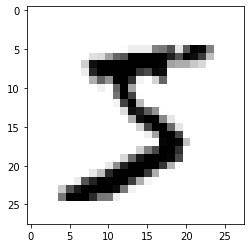

le nombre est  5


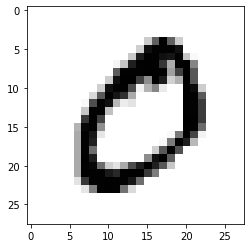

le nombre est  0


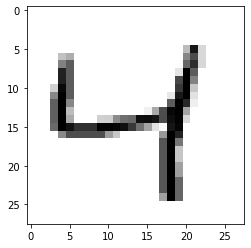

le nombre est  4


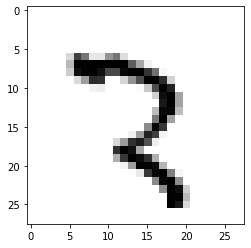

le nombre est  3


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
#pour être sur que ce sera importé en ligne 

Liste = [0,1,2,500]
for n in Liste:
  plt.imshow(xtrain[n], cmap='binary')  #la deuxième image #c'esr du noir sur blanc
  plt.show()
  print("le nombre est ", ytrain[n] )

Voir les etiquettes 

In [ ]:
print(set(ytrain))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


On fera une normalisation: encodage sur 9 bits: une valeur sera=1 et le reste sera nul

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

In [ ]:
ytrain[:7], ytrain_encoded[:7]

(array([5, 0, 4, 1, 9, 2, 1], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

chaque donnée devient une liste de 0 et de 1 seul 1

C'est un probleme de regression lineaire finalement
On aura 3 couches, 128 noeuds dans les deux premières et 10 dans la troixième

On va transformer les tableaux en vecteurs

In [ ]:
import numpy as np 
new_shape = xtrain.shape[0], xtrain.shape[1]*xtrain.shape[2]
x_train_reshaped = xtrain.reshape(new_shape)
print("x_train_reshaped.shape = ",x_train_reshaped.shape)

new_shape = xtest.shape[0], xtest.shape[1]*xtest.shape[2]
x_test_reshaped = xtest.reshape(new_shape)
print("x_test_reshaped.shape= ",x_test_reshaped.shape)

x_train_reshaped.shape =  (60000, 784)
x_test_reshaped.shape=  (10000, 784)


chaque element est un pixel, une intensite entre 0 et 255

In [ ]:
#print(x_train_reshaped[0])
max(x_train_reshaped[0])

255

On va normamiser les données: on soustrait la moyenne et on divise par l'ecart-type

In [ ]:
x_mean_train = x_train_reshaped.mean()
print( "moyenne =",x_mean_train)
x_var_train = x_train_reshaped.std()
print("ecart-type = ", x_var_train)

x_mean_test = x_test_reshaped.mean()
print( "moyenne =",x_mean_test)
x_var_test = x_test_reshaped.std()
print("ecart-type = ", x_var_test)

moyenne = 33.318421449829934
ecart-type =  78.56748998339798
moyenne = 33.791224489795916
ecart-type =  79.17246322228644


In [ ]:
x_train_norme = (x_train_reshaped - x_mean_train)/x_var_train 
x_test_norme = (x_test_reshaped - x_mean_test)/x_var_test 


creation du reseau de neurone: 3 couches: 128,128,10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([ 
    Dense(128,activation="relu", input_shape=(784,)),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax"),
  ])

In [ ]:
model.compile(
    optimizer="sgd",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


precision sur le train: le loss est une variance et le accuraccy est l'efficacité

In [ ]:
model.fit(x_train_norme, ytrain_encoded ,epochs=3  )

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5939 - accuracy: 0.8245
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1960 - accuracy: 0.9426
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1415 - accuracy: 0.9589


precision sur le test

In [ ]:
loss,accuracy =model.evaluate(x_test_norme,ytest_encoded) 
print("variance on test= ",loss)
print("precision on test= ",accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9605
variance on test=  0.13121363520622253
precision on test=  0.9605000019073486


voir les 25 premieres images

In [ ]:
preds = model.predict(x_test_norme)
print("preds.shape = ", preds.shape) #10000 images test * 10 elms par liste

preds[0] #elemt_i = proba que la premiere image soit = i. Il prends la plus grande valeur ey dit que c'est ça l'image


preds.shape =  (10000, 10)


array([1.72145272e-04, 2.03799596e-06, 8.91095668e-04, 3.55414371e-03,
       1.35228793e-05, 1.07166794e-04, 1.16687389e-07, 9.92021739e-01,
       1.19051227e-04, 3.11907963e-03], dtype=float32)

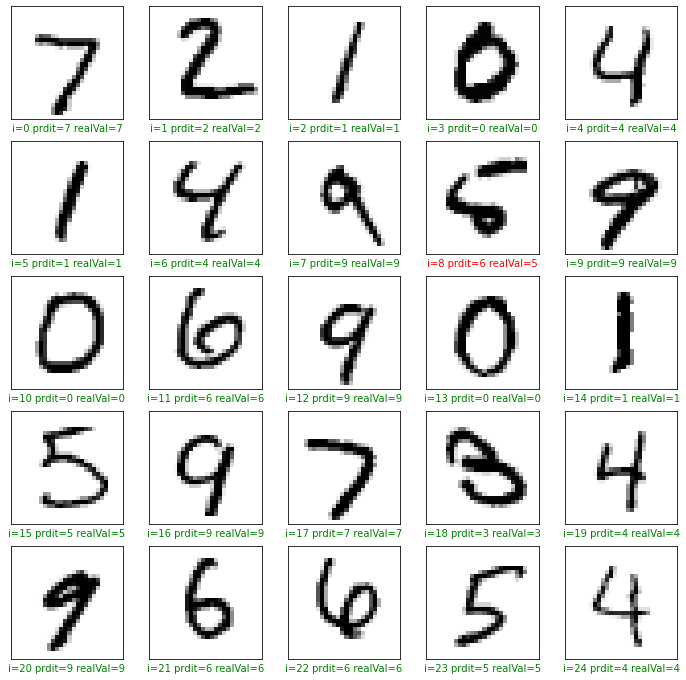

In [ ]:
plt.figure(figsize=(12,12)) #fixer la taille de l'image

start_index = 0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index+ i])  #recupere la plus grande probabilite
  gt = ytest[start_index + i] #veritable valeur

  col="g"
  if pred!=gt:
    col='r'
  plt.xlabel("i={} prdit={} realVal={}".format(i,pred,gt),color=col)
  plt.imshow(xtest[start_index+i],cmap="binary")

plt.show()

voir quelle etait sa precision

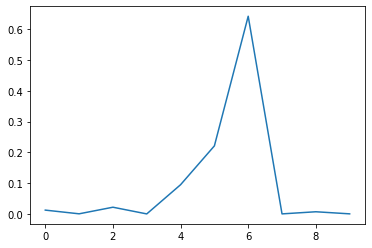

In [ ]:
plt.plot(preds[8])
plt.show()

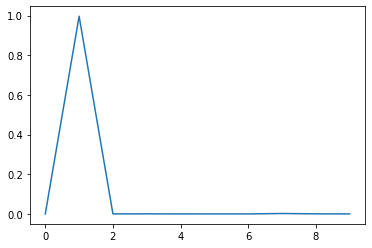

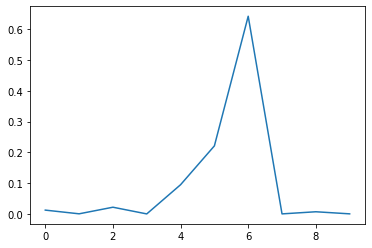

In [ ]:
plt.plot(preds[5])
plt.show()
plt.plot(preds[8])
plt.show()